In [2]:
#Import Libraries
#Load Dataset

#Analysis
#Number of matches by each team in every season
#Wins by each team
#Most man of the match
#Performance of top bowlers and batsman
#Run rate per team per season
#Wicket rate per team per season
#Wins in home ground vs other grounds.
#Toss win/loss mapping to match win or loss
#Number of Tie matches per season

In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load Datasets
import os

In [5]:
os.getcwd()

'/Users/penguin/Desktop/projects/Kaggle Datasets/ipl'

In [120]:
os.chdir('/Users/penguin/Desktop/projects/Kaggle Datasets/ipl')

In [6]:
os.getcwd()

'/Users/penguin/Desktop/projects/Kaggle Datasets/ipl'

In [7]:
matches = pd.read_csv("matches.csv")

In [8]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
deliveries = pd.read_csv("deliveries.csv")

In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
#Checking the Columns for Datasets
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [12]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [13]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [18]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [17]:
matches.drop(['umpire3'], axis=1, inplace=True) #since all the values are NAN
#axis = 0 -> direction along rows
#axis = 1 -> direction along columns

ValueError: labels ['umpire3'] not contained in axis

In [19]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [20]:
# In deliveries (replace) fill all NAN columns with 0 for imporved computation
deliveries.fillna(0, inplace=True)

In [21]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0


In [22]:
# Create Array of Seasons, teamNames and results
seasons = matches.season.unique()
teamNames = matches.team1.unique()
results = matches.result.unique()

In [23]:
seasons

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [24]:
teamNames

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [25]:
results

array(['normal', 'tie', 'no result'], dtype=object)

In [26]:
# Replace Names of teams with Abbriviations
matches.replace(teamNames, ['SRH', 'MI', 'GL', 'RPS', 'RCB',
                           'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'DC',
                           'KTK', 'PW', 'RPS'], inplace = True)
deliveries.replace(teamNames, ['SRH', 'MI', 'GL', 'RPS', 'RCB',
                           'KKR', 'DD', 'KXIP', 'CSK', 'RR', 'DC',
                           'KTK', 'PW', 'RPS'], inplace = True)

In [27]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [28]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


Analysis
#Number of matches by each team in every season

In [29]:
sns.set_style("dark")

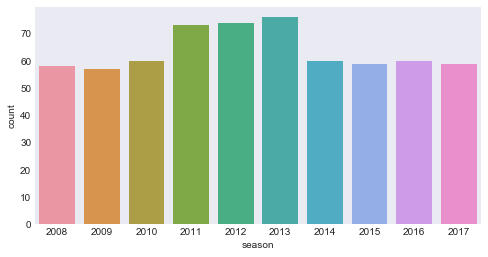

In [219]:
sns.countplot(x="season",  data = matches)

Most number of matches were played in the year 2013.

-----

#Wins by each team

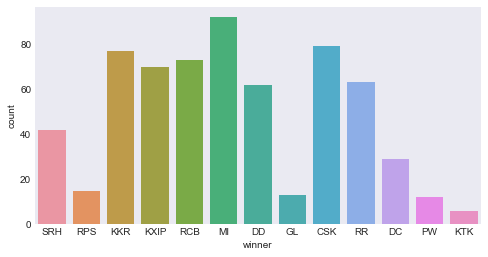

In [31]:
sns.countplot(x = 'winner', data = matches)

MI - Mumbai Indians have registers the maximum wins in all the seasons of IPL held until 2017. This could be because the team is owned by Reliance group, which is capable of paying higher bids to get the best of players. 

CSK - Chennai Super Kings have registered the second highest number of wins in all the seasons of IPL held until 2017.

KTK - Kochi Tuskers Kerala have registered the least number of wins in all the seasons geld until 2017. This is a relatively new team and hence may have played less number of matches.  

---

#Number of Matches played by each team

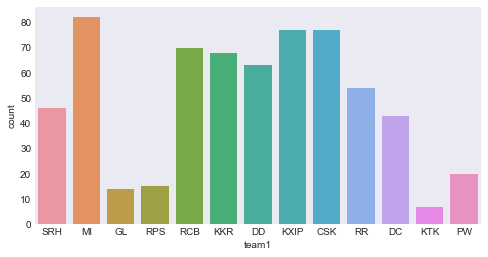

In [32]:
sns.countplot(x = 'team1', data = matches)

The number of matches played by each team indicates weather the teams have been playing since the begining of IPL of or are relatively new. 

The least wins registered by KTK is supported by the fact that it has palyed less number of matches. 

It would be further interesting to understand the percentage wins registered by each team. Lets have a look at it.

---

#Percentage wins registered by each team

In [33]:
playedbyTeam1 = matches.groupby('team1').size()
playedbyTeam2 = matches.groupby('team2').size()
matchesPlayed = playedbyTeam1 + playedbyTeam2



In [34]:
matchesPlayed

team1
CSK     131
DC       75
DD      147
GL       30
KKR     148
KTK      14
KXIP    148
MI      157
PW       46
RCB     152
RPS      30
RR      118
SRH      76
dtype: int64

In [35]:
type(matchesPlayed)

pandas.core.series.Series

In [36]:
matchWinners = matches.groupby('winner').size()

In [37]:
matchWinners

winner
CSK     79
DC      29
DD      62
GL      13
KKR     77
KTK      6
KXIP    70
MI      92
PW      12
RCB     73
RPS     15
RR      63
SRH     42
dtype: int64

In [38]:
pctWins = pd.concat([matchesPlayed, matchWinners], axis = 1)

In [39]:
type(pctWins)

pandas.core.frame.DataFrame

In [40]:
pctWins.columns = ['matchesPlayed', 'matchWinners']

In [41]:
pctWins.rename_axis('Teams', axis='columns', inplace=True)

Teams,matchesPlayed,matchWinners
CSK,131,79
DC,75,29
DD,147,62
GL,30,13
KKR,148,77
KTK,14,6
KXIP,148,70
MI,157,92
PW,46,12
RCB,152,73


In [42]:
pctWins['winPercent'] = (pctWins['matchWinners']/pctWins['matchesPlayed'])*100

In [43]:
pctWins = pctWins.rename_axis('Teams', axis='columns', inplace=True)

In [44]:
pctWins

Teams,matchesPlayed,matchWinners,winPercent
CSK,131,79,60.305344
DC,75,29,38.666667
DD,147,62,42.176871
GL,30,13,43.333333
KKR,148,77,52.027027
KTK,14,6,42.857143
KXIP,148,70,47.297297
MI,157,92,58.598726
PW,46,12,26.086957
RCB,152,73,48.026316


In [45]:
# Plot of Win Percentage for every team 

In [46]:
type(pctWins)

pandas.core.frame.DataFrame

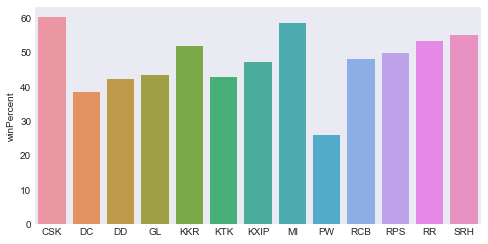

In [47]:
sns.barplot(x=pctWins.index, y='winPercent', data=pctWins)

This plot of the percentage wins by the teams indicates that CSK - Chennai Super Kings have had the highest rate of sucess followed Mumbai Indians. 

As seen earlier KTK - Kochi Tuskars Kerala although registered the leat number of wins, its success rate is high, indicative of the fact that the team formed and started to play only in the later seasons of the.

----

#Add the Column Match type to Matches dataset
#Describe the Type of Match
#Define the performance of the team based on its metrics of reaching finals.

In [48]:
matches["type"] = "pre-qualifier"

In [49]:
for year in range(2008, 2017):
    final_match_index = matches[matches['season']==year][-1:].index.values[0]
    matches = matches.set_value(final_match_index, "type", "Final")
    matches = matches.set_value(final_match_index-1, "type", "qualifier-2")
    matches = matches.set_value(final_match_index-2, "type", "eliminator")
    matches = matches.set_value(final_match_index-3, "type", "qualifier-1")


matches.groupby(["type"]).size()


type
Final              9
eliminator         9
pre-qualifier    600
qualifier-1        9
qualifier-2        9
dtype: int64

In [50]:
#Teams that reached the finals maximum times

t1 = matches[matches.type=='Final'].groupby('team1').size()
t2 = matches[matches.type=='Final'].groupby('team2').size()

In [51]:
t1

team1
CSK     4
DC      1
KXIP    1
MI      2
SRH     1
dtype: int64

In [52]:
t2

team2
CSK    2
KKR    2
MI     1
RCB    3
RR     1
dtype: int64

In [53]:
finalTeams = pd.concat([t1, t2], axis=1)

In [54]:
finalTeams.fillna(0, inplace=True)

In [55]:
finalTeams

,0,1
CSK,4.0,2.0
DC,1.0,0.0
KKR,0.0,2.0
KXIP,1.0,0.0
MI,2.0,1.0
RCB,0.0,3.0
RR,0.0,1.0
SRH,1.0,0.0


In [56]:
finalTeams['timesinFinals'] = finalTeams[0] + finalTeams[1]

In [57]:
finalTeams

,0,1,timesinFinals
CSK,4.0,2.0,6.0
DC,1.0,0.0,1.0
KKR,0.0,2.0,2.0
KXIP,1.0,0.0,1.0
MI,2.0,1.0,3.0
RCB,0.0,3.0,3.0
RR,0.0,1.0,1.0
SRH,1.0,0.0,1.0


In [58]:
finalTeams.drop([0,1], 1, inplace=True)

In [59]:
finalTeams

,timesinFinals
CSK,6.0
DC,1.0
KKR,2.0
KXIP,1.0
MI,3.0
RCB,3.0
RR,1.0
SRH,1.0


In [60]:
finalTeams = finalTeams.rename_axis('Teams', axis='columns', inplace=True)

In [61]:
finalTeams

Teams,timesinFinals
CSK,6.0
DC,1.0
KKR,2.0
KXIP,1.0
MI,3.0
RCB,3.0
RR,1.0
SRH,1.0


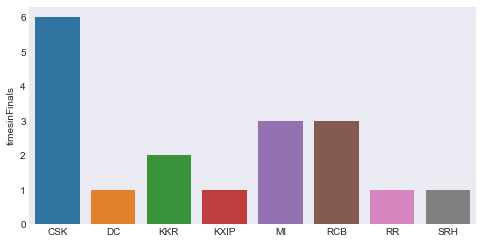

In [62]:
sns.barplot(x=finalTeams.index, y='timesinFinals', data=finalTeams)

CSK - Chennai Super Kings reached the Finals the maximum number of time in all of the seasons played. MI - Mumbai Indians and RCB - Royal Challengers Banaglore come joint second in reaching the finals the maximum number of times. 

However Considering that CSK has a track record of winning 60% of all the matches it would be interesting to see how many times it has actually won the season. 

In [63]:
teamwinner = matches[matches.type=='Final'].groupby('winner').size()

In [64]:
teamwinner

winner
CSK    2
DC     1
KKR    2
MI     2
RR     1
SRH    1
dtype: int64

In [65]:
finalTeams['teamwinner'] = teamwinner

In [66]:
finalTeams.drop(['t1.winner', 't2.winner'], 1, inplace=True)

ValueError: labels ['t1.winner' 't2.winner'] not contained in axis

In [67]:
finalTeams.fillna(0, inplace=True)

In [68]:
finalTeams

Teams,timesinFinals,teamwinner
CSK,6.0,2.0
DC,1.0,1.0
KKR,2.0,2.0
KXIP,1.0,0.0
MI,3.0,2.0
RCB,3.0,0.0
RR,1.0,1.0
SRH,1.0,1.0


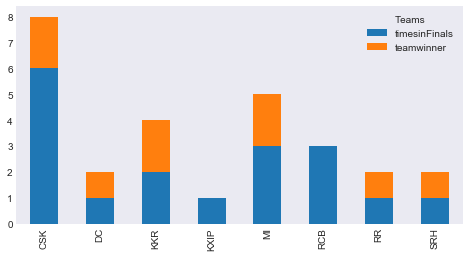

In [69]:
plot = finalTeams.plot(kind='bar', stacked=True)
sns.set_palette("Paired", len(finalTeams['teamwinner']))

This Plot shows the number of times each team has been in finals and how many times its has actually won the season. CSK, MI and KKR have all won the season twice. 

---

#Most man of the match

In [70]:
manofmatch = matches.groupby('player_of_match').size()

In [71]:
manofmatch

player_of_match
A Chandila            1
A Kumble              3
A Mishra              9
A Nehra               6
A Singh               1
A Symonds             3
A Zampa               1
AA Jhunjhunwala       1
AB Dinda              2
AB de Villiers       15
AC Gilchrist          7
AC Voges              1
AD Mascarenhas        1
AD Mathews            1
AD Russell            6
AJ Finch              5
AJ Tye                2
AM Rahane            12
AP Tare               1
AR Patel              4
AT Rayudu             7
Azhar Mahmood         2
B Kumar               5
B Lee                 2
BA Bhatt              1
BA Stokes             3
BB McCullum           5
BCJ Cutting           1
BJ Hodge              6
BW Hilfenhaus         2
                     ..
SL Malinga            5
SM Katich             1
SM Pollock            2
SP Goswami            1
SP Narine             6
SPD Smith             4
SR Tendulkar          8
SR Watson            10
SS Iyer               2
ST Jayasuriya         2


In [72]:
type(manofmatch)

pandas.core.series.Series

In [73]:
manofmatch = pd.DataFrame(manofmatch)

In [74]:
manofmatch

,0
player_of_match,
A Chandila,1
A Kumble,3
A Mishra,9
A Nehra,6
A Singh,1
A Symonds,3
A Zampa,1
AA Jhunjhunwala,1
AB Dinda,2


In [75]:
manofmatch.columns = ['NumberOfTimes']

In [76]:
manofmatch.index.name = None

In [77]:
manofmatch = manofmatch.rename_axis('Player', axis='columns', 
                                    inplace=True)

In [78]:
manofmatch

Player,NumberOfTimes
A Chandila,1
A Kumble,3
A Mishra,9
A Nehra,6
A Singh,1
A Symonds,3
A Zampa,1
AA Jhunjhunwala,1
AB Dinda,2
AB de Villiers,15


In [79]:
manofmatch = manofmatch.sort_values(by='NumberOfTimes', 
                                    ascending=False)

In [80]:
manofmatch

Player,NumberOfTimes
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
MS Dhoni,13
G Gambhir,13
AM Rahane,12
MEK Hussey,12


In [84]:
manofmatch = manofmatch.head(10)

In [85]:
manofmatch

Player,NumberOfTimes
CH Gayle,18
YK Pathan,16
DA Warner,15
AB de Villiers,15
RG Sharma,14
SK Raina,14
MS Dhoni,13
G Gambhir,13
AM Rahane,12
MEK Hussey,12


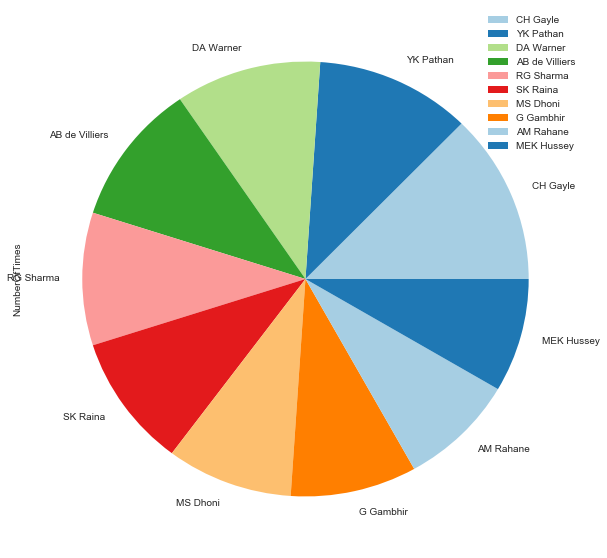

In [86]:
manofmatch.plot.pie(y='NumberOfTimes', figsize=(10,10))

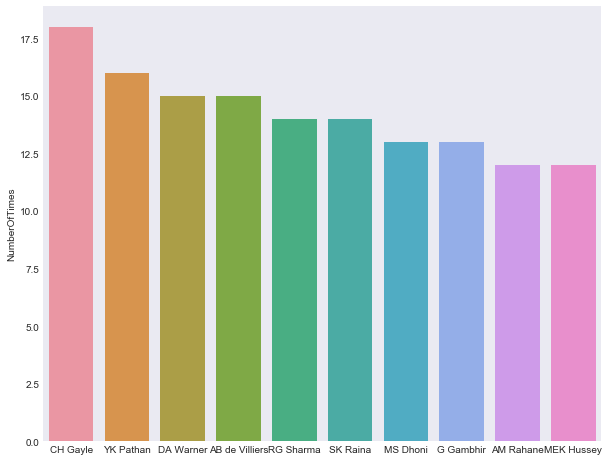

In [327]:
plt.figure(figsize=(10, 8))
sns.barplot(x=manofmatch.index, y='NumberOfTimes', 
            data=manofmatch)

CH Gayle has won the Man of the Match title the maximum number of times. 

---

#Batsman and bowler performances

In [88]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


#Batsman Aggrigates - Runs Scored by each Batsman

In [90]:

batsman = deliveries.groupby(["match_id", "inning", 
                                   "batting_team", "batsman"])

In [91]:
batsman

In [92]:
batsmen = batsman["batsman_runs"].sum().reset_index()

In [93]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,SRH,BCJ Cutting,16
1,1,1,SRH,DA Warner,14
2,1,1,SRH,DJ Hooda,16
3,1,1,SRH,MC Henriques,52
4,1,1,SRH,S Dhawan,40
5,1,1,SRH,Yuvraj Singh,62
6,1,2,RCB,A Choudhary,6
7,1,2,RCB,CH Gayle,32
8,1,2,RCB,KM Jadhav,31
9,1,2,RCB,Mandeep Singh,24


In [94]:
type(batsmen)

pandas.core.frame.DataFrame

In [96]:
batsman_scores = pd.DataFrame(batsmen)

In [97]:
batsman_scores

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,SRH,BCJ Cutting,16
1,1,1,SRH,DA Warner,14
2,1,1,SRH,DJ Hooda,16
3,1,1,SRH,MC Henriques,52
4,1,1,SRH,S Dhawan,40
5,1,1,SRH,Yuvraj Singh,62
6,1,2,RCB,A Choudhary,6
7,1,2,RCB,CH Gayle,32
8,1,2,RCB,KM Jadhav,31
9,1,2,RCB,Mandeep Singh,24


In [98]:
batsmen_total_score = pd.DataFrame(batsman_scores.groupby('batsman').sum().reset_index())

In [99]:
bastmen_top_sorted = batsmen_total_score.sort_values(by='batsman_runs', 
                                    ascending=False)

In [100]:
bastmen_top_sorted

,batsman,match_id,inning,batsman_runs
374,SK Raina,51289,226,4548
431,V Kohli,47900,219,4423
323,RG Sharma,48924,228,4207
137,G Gambhir,46213,232,4132
103,DA Warner,42095,171,4014
340,RV Uthappa,45966,230,3778
85,CH Gayle,37240,157,3651
347,S Dhawan,42388,176,3561
259,MS Dhoni,45969,197,3560
22,AB de Villiers,42226,181,3486


In [101]:
batsmen_top10 = bastmen_top_sorted.head(10)

In [102]:
batsmen_top10

,batsman,match_id,inning,batsman_runs
374,SK Raina,51289,226,4548
431,V Kohli,47900,219,4423
323,RG Sharma,48924,228,4207
137,G Gambhir,46213,232,4132
103,DA Warner,42095,171,4014
340,RV Uthappa,45966,230,3778
85,CH Gayle,37240,157,3651
347,S Dhawan,42388,176,3561
259,MS Dhoni,45969,197,3560
22,AB de Villiers,42226,181,3486


In [103]:
batsmen_top10['averagepermatch'] = batsmen_top10['batsman_runs']/batsmen_top10['inning']

In [104]:
batsmen_top10

,batsman,match_id,inning,batsman_runs,averagepermatch
374,SK Raina,51289,226,4548,20.123894
431,V Kohli,47900,219,4423,20.196347
323,RG Sharma,48924,228,4207,18.451754
137,G Gambhir,46213,232,4132,17.810345
103,DA Warner,42095,171,4014,23.473684
340,RV Uthappa,45966,230,3778,16.426087
85,CH Gayle,37240,157,3651,23.254777
347,S Dhawan,42388,176,3561,20.232955
259,MS Dhoni,45969,197,3560,18.071066
22,AB de Villiers,42226,181,3486,19.259669


Looking at the Average runs score per match, DA Warner has the highest run rate, followed closely by CH Gayle

---

#Top 10 Bolwers and their average wickets taken per match 

In [105]:
bowler_wickets = deliveries.groupby(['match_id', 'inning', 'bowling_team', 
                'bowler', 'over'])

In [106]:
bowler_runs = bowler_wickets['total_runs', 'wide_runs', 'bye_runs',
        'legbye_runs', 'noball_runs'].sum().reset_index()

In [107]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,total_runs,wide_runs,bye_runs,legbye_runs,noball_runs
0,1,1,RCB,A Choudhary,2,16,0,0,0,1
1,1,1,RCB,A Choudhary,10,4,0,0,0,0
2,1,1,RCB,A Choudhary,13,18,1,0,0,0
3,1,1,RCB,A Choudhary,18,17,2,0,0,0
4,1,1,RCB,S Aravind,5,9,0,0,0,0
5,1,1,RCB,S Aravind,12,8,0,0,0,0
6,1,1,RCB,S Aravind,15,19,0,0,0,0
7,1,1,RCB,SR Watson,6,17,0,0,0,0
8,1,1,RCB,SR Watson,14,8,0,0,0,0
9,1,1,RCB,SR Watson,20,16,0,0,0,0


In [108]:
bowler_runs["runs"] = bowler_runs["total_runs"] - (bowler_runs["bye_runs"] + 
                        bowler_runs['legbye_runs'])

In [109]:
bowler_runs["extras"] = bowler_runs["wide_runs"] + bowler_runs['noball_runs']

In [110]:
del(bowler_runs["bye_runs"])
del(bowler_runs["legbye_runs"])
del(bowler_runs["total_runs"])


In [111]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras
0,1,1,RCB,A Choudhary,2,0,1,16,1
1,1,1,RCB,A Choudhary,10,0,0,4,0
2,1,1,RCB,A Choudhary,13,1,0,18,1
3,1,1,RCB,A Choudhary,18,2,0,17,2
4,1,1,RCB,S Aravind,5,0,0,9,0
5,1,1,RCB,S Aravind,12,0,0,8,0
6,1,1,RCB,S Aravind,15,0,0,19,0
7,1,1,RCB,SR Watson,6,0,0,17,0
8,1,1,RCB,SR Watson,14,0,0,8,0
9,1,1,RCB,SR Watson,20,0,0,16,0


In [112]:
dismissal_kind_bowlers = ["bowled", "caught", "lbw", "stumped", 
                          "caught and bowled", "hit wicket"]

In [113]:
dismissals = deliveries[deliveries["dismissal_kind"].isin(dismissal_kind_bowlers)]

In [108]:
dismissals

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,0
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,0
165,1,2,RCB,SRH,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
206,1,2,RCB,SRH,13,5,TM Head,SR Watson,Rashid Khan,0,...,0,0,0,0,0,0,0,TM Head,caught,Yuvraj Singh
211,1,2,RCB,SRH,14,4,Sachin Baby,SR Watson,Bipul Sharma,0,...,0,0,0,0,0,0,0,Sachin Baby,caught,MC Henriques
230,1,2,RCB,SRH,17,5,STR Binny,SR Watson,B Kumar,0,...,0,0,0,0,0,0,0,STR Binny,caught,Yuvraj Singh
234,1,2,RCB,SRH,18,3,SR Watson,S Aravind,A Nehra,0,...,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques


In [114]:
dismisslas = dismissals.groupby(["match_id", "inning", "bowling_team", 
            "bowler", "over"])["dismissal_kind"].count().reset_index()

In [115]:
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

In [120]:

bowler_runs = bowler_runs.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")

In [121]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,batting_team,...,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,wickets,fielder
0,1,1,RCB,A Choudhary,2,0,1,16,1,SRH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DA Warner,caught,Mandeep Singh
1,1,1,RCB,A Choudhary,10,0,0,4,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,RCB,A Choudhary,13,1,0,18,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,RCB,A Choudhary,18,2,0,17,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,RCB,S Aravind,5,0,0,9,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,RCB,S Aravind,12,0,0,8,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1,RCB,S Aravind,15,0,0,19,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,1,RCB,SR Watson,6,0,0,17,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,1,RCB,SR Watson,14,0,0,8,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,1,RCB,SR Watson,20,0,0,16,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
bowler_runs["wickets"] = bowler_runs["wickets"].fillna(0)

In [114]:
bowler_overs = bowler_runs.groupby(["match_id", "inning", "bowling_team", 
                "bowler"])["over"].count().reset_index()

In [132]:
bowler_runs = bowler_runs.groupby(['match_id', 'inning', 'bowling_team', 
            'bowler']).sum().reset_index()

In [116]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,ball,is_super_over,wide_runs_y,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,RCB,A Choudhary,43,3,1,55,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,RCB,S Aravind,32,0,0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,RCB,SR Watson,40,0,0,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,RCB,STR Binny,11,0,0,10,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,RCB,TM Head,8,0,0,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,RCB,TS Mills,40,2,0,31,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,RCB,YS Chahal,36,0,0,22,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2,SRH,A Nehra,51,1,0,44,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,2,SRH,B Kumar,42,1,0,27,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,2,SRH,BCJ Cutting,50,2,0,35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
bowlers_over = bowler_runs.groupby(['match_id', 'inning', 'bowling_team', 
                'bowler'])['over'].count().reset_index()

In [125]:
bowlers_over

,match_id,inning,bowling_team,bowler,over
0,1,1,RCB,A Choudhary,4
1,1,1,RCB,S Aravind,3
2,1,1,RCB,SR Watson,3
3,1,1,RCB,STR Binny,1
4,1,1,RCB,TM Head,1
5,1,1,RCB,TS Mills,4
6,1,1,RCB,YS Chahal,4
7,1,2,SRH,A Nehra,5
8,1,2,SRH,B Kumar,4
9,1,2,SRH,BCJ Cutting,4


In [126]:
bowler_runs = bowler_runs.groupby(['match_id', 'inning', 'bowling_team', 
                'bowler']).sum().reset_index().drop('over', 1)

In [127]:
bowler_runs

,match_id,inning,bowling_team,bowler,wide_runs_x,noball_runs_x,runs,extras,ball,is_super_over,wide_runs_y,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,RCB,A Choudhary,3,1,55,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,RCB,S Aravind,0,0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,RCB,SR Watson,0,0,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,RCB,STR Binny,0,0,10,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,RCB,TM Head,0,0,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,RCB,TS Mills,2,0,31,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,RCB,YS Chahal,0,0,22,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2,SRH,A Nehra,1,0,44,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,2,SRH,B Kumar,1,0,27,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,2,SRH,BCJ Cutting,2,0,35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
bowler_runs = bowlers_over.merge(bowler_runs, on = ['match_id', 'inning', 
                                'bowling_team', 'bowler'], how = 'left')

In [130]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,ball,is_super_over,wide_runs_y,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,RCB,A Choudhary,4,3,1,55,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,RCB,S Aravind,3,0,0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,RCB,SR Watson,3,0,0,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,RCB,STR Binny,1,0,0,10,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,RCB,TM Head,1,0,0,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,RCB,TS Mills,4,2,0,31,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,1,RCB,YS Chahal,4,0,0,22,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2,SRH,A Nehra,5,1,0,44,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,2,SRH,B Kumar,4,1,0,27,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,2,SRH,BCJ Cutting,4,2,0,35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
bowler_runs['Econ'] = np.round(bowler_runs['runs'] / bowler_runs['over'], 2)

In [132]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,ball,is_super_over,wide_runs_y,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs,Econ
0,1,1,RCB,A Choudhary,4,3,1,55,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.75
1,1,1,RCB,S Aravind,3,0,0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00
2,1,1,RCB,SR Watson,3,0,0,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.67
3,1,1,RCB,STR Binny,1,0,0,10,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00
4,1,1,RCB,TM Head,1,0,0,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00
5,1,1,RCB,TS Mills,4,2,0,31,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.75
6,1,1,RCB,YS Chahal,4,0,0,22,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.50
7,1,2,SRH,A Nehra,5,1,0,44,1,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.80
8,1,2,SRH,B Kumar,4,1,0,27,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.75
9,1,2,SRH,BCJ Cutting,4,2,0,35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.75


In [138]:
bowler_runs = matches[['id','season']].merge(bowler_runs, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [139]:
bowler_runs

,season,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,...,is_super_over,wide_runs_y,bye_runs,legbye_runs,noball_runs_y,penalty_runs,batsman_runs,extra_runs,total_runs,Econ
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00
2,2017,1,1,RCB,SR Watson,3,0,0,41,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.67
3,2017,1,1,RCB,STR Binny,1,0,0,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00
4,2017,1,1,RCB,TM Head,1,0,0,11,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00
5,2017,1,1,RCB,TS Mills,4,2,0,31,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.75
6,2017,1,1,RCB,YS Chahal,4,0,0,22,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.50
7,2017,1,2,SRH,A Nehra,5,1,0,44,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.80
8,2017,1,2,SRH,B Kumar,4,1,0,27,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.75
9,2017,1,2,SRH,BCJ Cutting,4,2,0,35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.75


In [140]:
bowler_runs.columns

Index(['season', 'match_id', 'inning', 'bowling_team', 'bowler', 'over',
       'wide_runs_x', 'noball_runs_x', 'runs', 'extras', 'ball',
       'is_super_over', 'wide_runs_y', 'bye_runs', 'legbye_runs',
       'noball_runs_y', 'penalty_runs', 'batsman_runs', 'extra_runs',
       'total_runs', 'Econ'],
      dtype='object')

In [141]:
bowlers_stats = bowler_runs.drop(['ball', 'is_super_over', 'wide_runs_y', 
                'bye_runs', 'legbye_runs', 'noball_runs_y', 'penalty_runs', 
                'batsman_runs', 'extra_runs', 'total_runs'], axis = 1)

In [146]:
bowlers_stats

,season,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,Econ
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,12.00
2,2017,1,1,RCB,SR Watson,3,0,0,41,0,13.67
3,2017,1,1,RCB,STR Binny,1,0,0,10,0,10.00
4,2017,1,1,RCB,TM Head,1,0,0,11,0,11.00
5,2017,1,1,RCB,TS Mills,4,2,0,31,2,7.75
6,2017,1,1,RCB,YS Chahal,4,0,0,22,0,5.50
7,2017,1,2,SRH,A Nehra,5,1,0,44,1,8.80
8,2017,1,2,SRH,B Kumar,4,1,0,27,1,6.75
9,2017,1,2,SRH,BCJ Cutting,4,2,0,35,2,8.75


In [178]:
bowlers_stats

,season,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,Econ
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,12.00
2,2017,1,1,RCB,SR Watson,3,0,0,41,0,13.67
3,2017,1,1,RCB,STR Binny,1,0,0,10,0,10.00
4,2017,1,1,RCB,TM Head,1,0,0,11,0,11.00
5,2017,1,1,RCB,TS Mills,4,2,0,31,2,7.75
6,2017,1,1,RCB,YS Chahal,4,0,0,22,0,5.50
7,2017,1,2,SRH,A Nehra,5,1,0,44,1,8.80
8,2017,1,2,SRH,B Kumar,4,1,0,27,1,6.75
9,2017,1,2,SRH,BCJ Cutting,4,2,0,35,2,8.75


In [322]:
bowlers_2017 = bowlers_stats[bowlers_stats.season==2017]


In [323]:
bowlers_2017

,season,match_id,inning,bowling_team,bowler,over,wide_runs_x,noball_runs_x,runs,extras,Econ
0,2017,1,1,RCB,A Choudhary,4,3,1,55,4,13.75
1,2017,1,1,RCB,S Aravind,3,0,0,36,0,12.00
2,2017,1,1,RCB,SR Watson,3,0,0,41,0,13.67
3,2017,1,1,RCB,STR Binny,1,0,0,10,0,10.00
4,2017,1,1,RCB,TM Head,1,0,0,11,0,11.00
5,2017,1,1,RCB,TS Mills,4,2,0,31,2,7.75
6,2017,1,1,RCB,YS Chahal,4,0,0,22,0,5.50
7,2017,1,2,SRH,A Nehra,5,1,0,44,1,8.80
8,2017,1,2,SRH,B Kumar,4,1,0,27,1,6.75
9,2017,1,2,SRH,BCJ Cutting,4,2,0,35,2,8.75


In [245]:
type(bowlers_2017)

pandas.core.frame.DataFrame

In [261]:
type(bowlers_stats)

pandas.core.frame.DataFrame

In [275]:
bwlrs = bowlers_stats.groupby('bowler')

In [300]:
topBowlers = bwlrs['over', 'runs'].sum().reset_index()

In [313]:
topBowlers = topBowlers.sort_values(by='runs', ascending=False)

In [314]:
topBowlers['Econ'] = topBowlers['runs'] / topBowlers['over']

In [316]:
topBowlers = topBowlers.sort_values(by='over', ascending=False)

In [318]:
topBowlers = topBowlers.head(10)

In [320]:
topBowlers = topBowlers.sort_values(by='Econ')

In [321]:
topBowlers

,bowler,over,runs,Econ
234,R Ashwin,390,2545,6.525641
294,SL Malinga,454,2999,6.605727
103,DW Steyn,356,2365,6.643258
117,Harbhajan Singh,497,3425,6.891348
5,A Mishra,461,3330,7.223427
355,Z Khan,380,2842,7.478947
229,PP Chawla,440,3320,7.545455
218,P Kumar,437,3308,7.569794
88,DJ Bravo,357,2832,7.932773
244,R Vinay Kumar,365,2974,8.147945


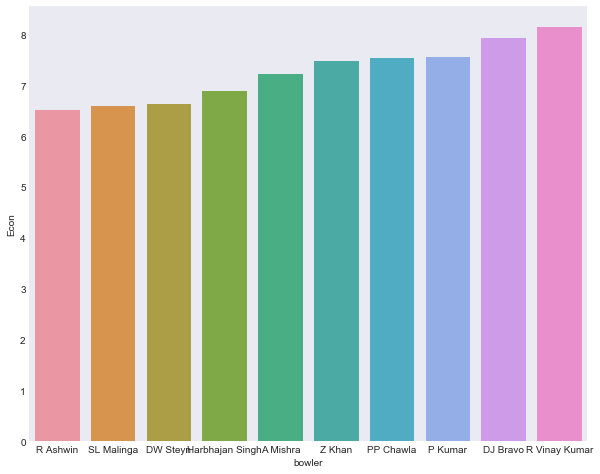

In [337]:
plt.figure(figsize=(10, 8))
sns.barplot(data=topBowlers, x='bowler',y='Econ')

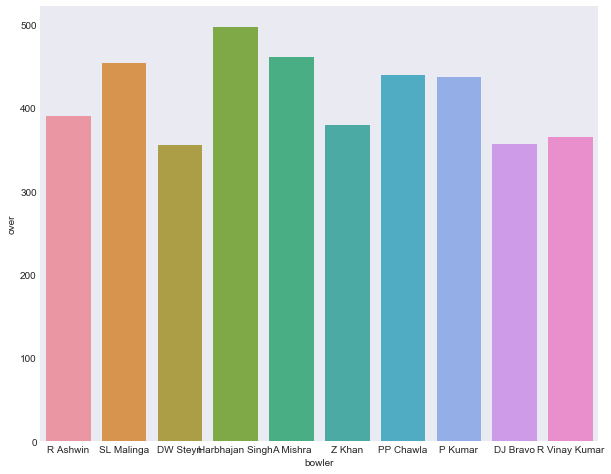

In [333]:
plt.figure(figsize=(10, 8))
sns.barplot(data=topBowlers, x='bowler',y='over')

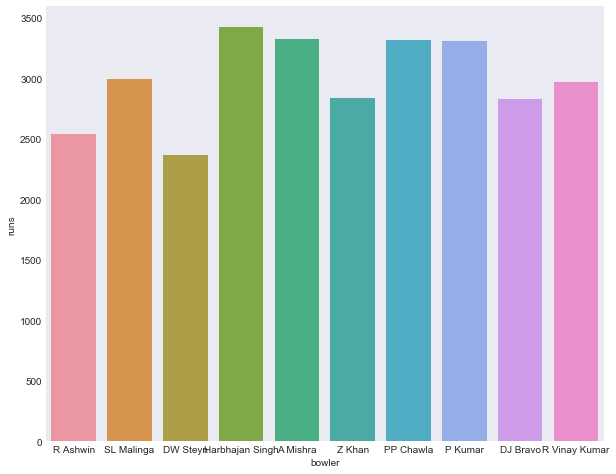

In [334]:
plt.figure(figsize=(10, 8))
sns.barplot(data=topBowlers, x='bowler',y='runs')

---

In [335]:
#Top bowlers for each seasons

In [324]:
bwlrs2017 = bowlers_2017.groupby('bowler')

In [325]:
topBowlers2017 = bwlrs2017['over', 'runs'].sum().reset_index()

In [326]:
topBowlers2017

,bowler,over,runs
0,A Choudhary,17,144
1,A Mishra,39,343
2,A Nehra,24,205
3,A Zampa,22,174
4,AB Dinda,10,119
5,AD Mathews,5,56
6,AF Milne,15,136
7,AJ Tye,24,150
8,AR Patel,50,370
9,AS Rajpoot,14,107
